In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
data=pd.read_csv("D:\\assignments\\assignment 16 Neural Networks\\gas_turbines.csv")
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [4]:
data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [5]:
data[data.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [7]:
correlation=data.corr()
correlation

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


<AxesSubplot:>

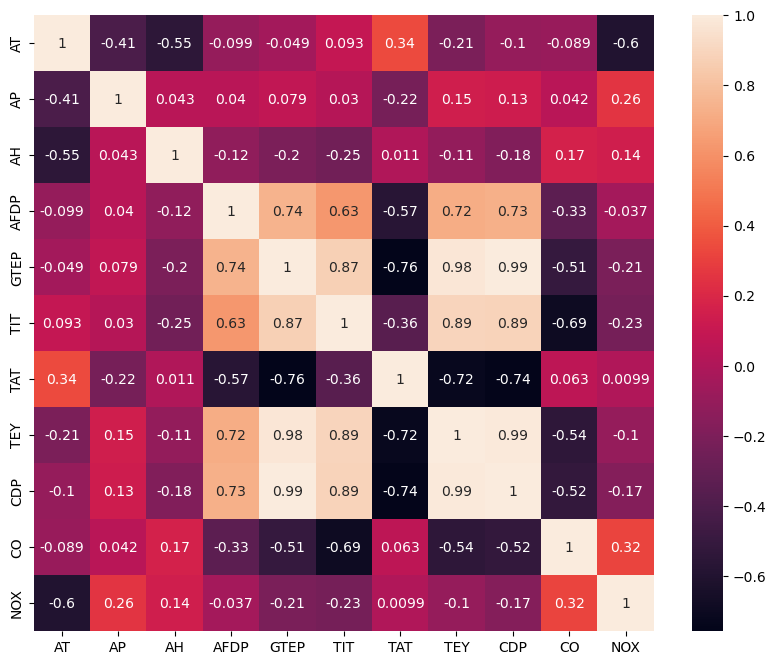

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True)

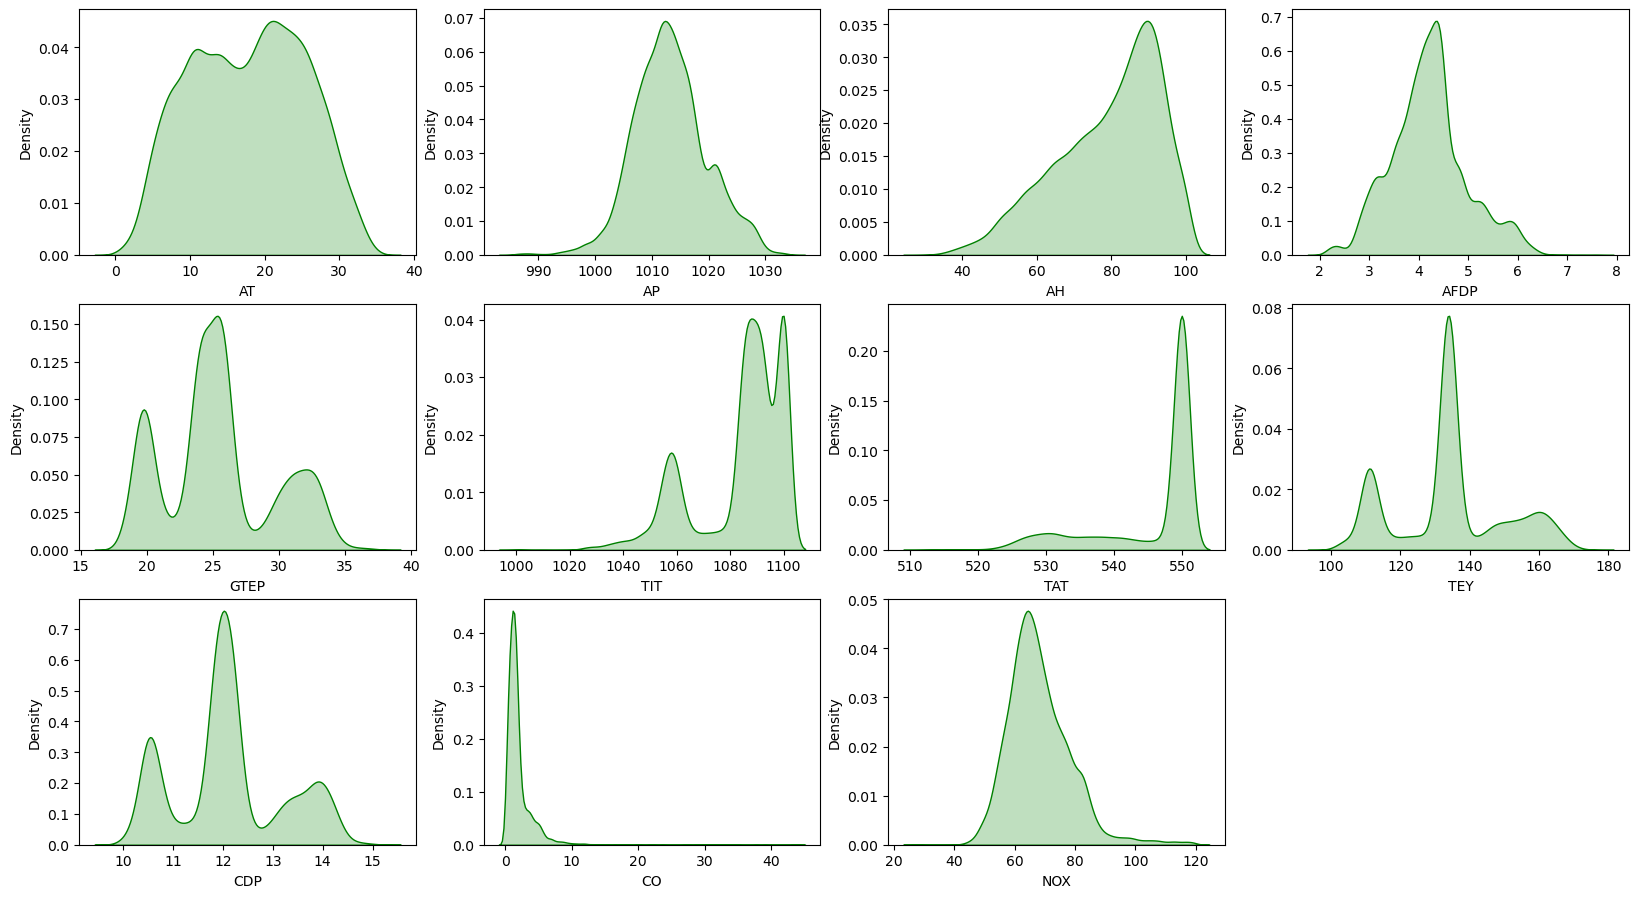

In [10]:
no_column = data.columns.tolist()

plt.figure(figsize=(20,30))
for i,column in enumerate(no_column,1):
    plt.subplot(8,4,i)
    sns.kdeplot(data[column],color='g',shade=True)

([<AxesSubplot:title={'center':'NOX'}>,
  <AxesSubplot:title={'center':'NOX'}>,
  Text(0.5, 1.0, 'NOX')],
 [<AxesSubplot:xlabel='NOX'>, <AxesSubplot:xlabel='NOX'>])

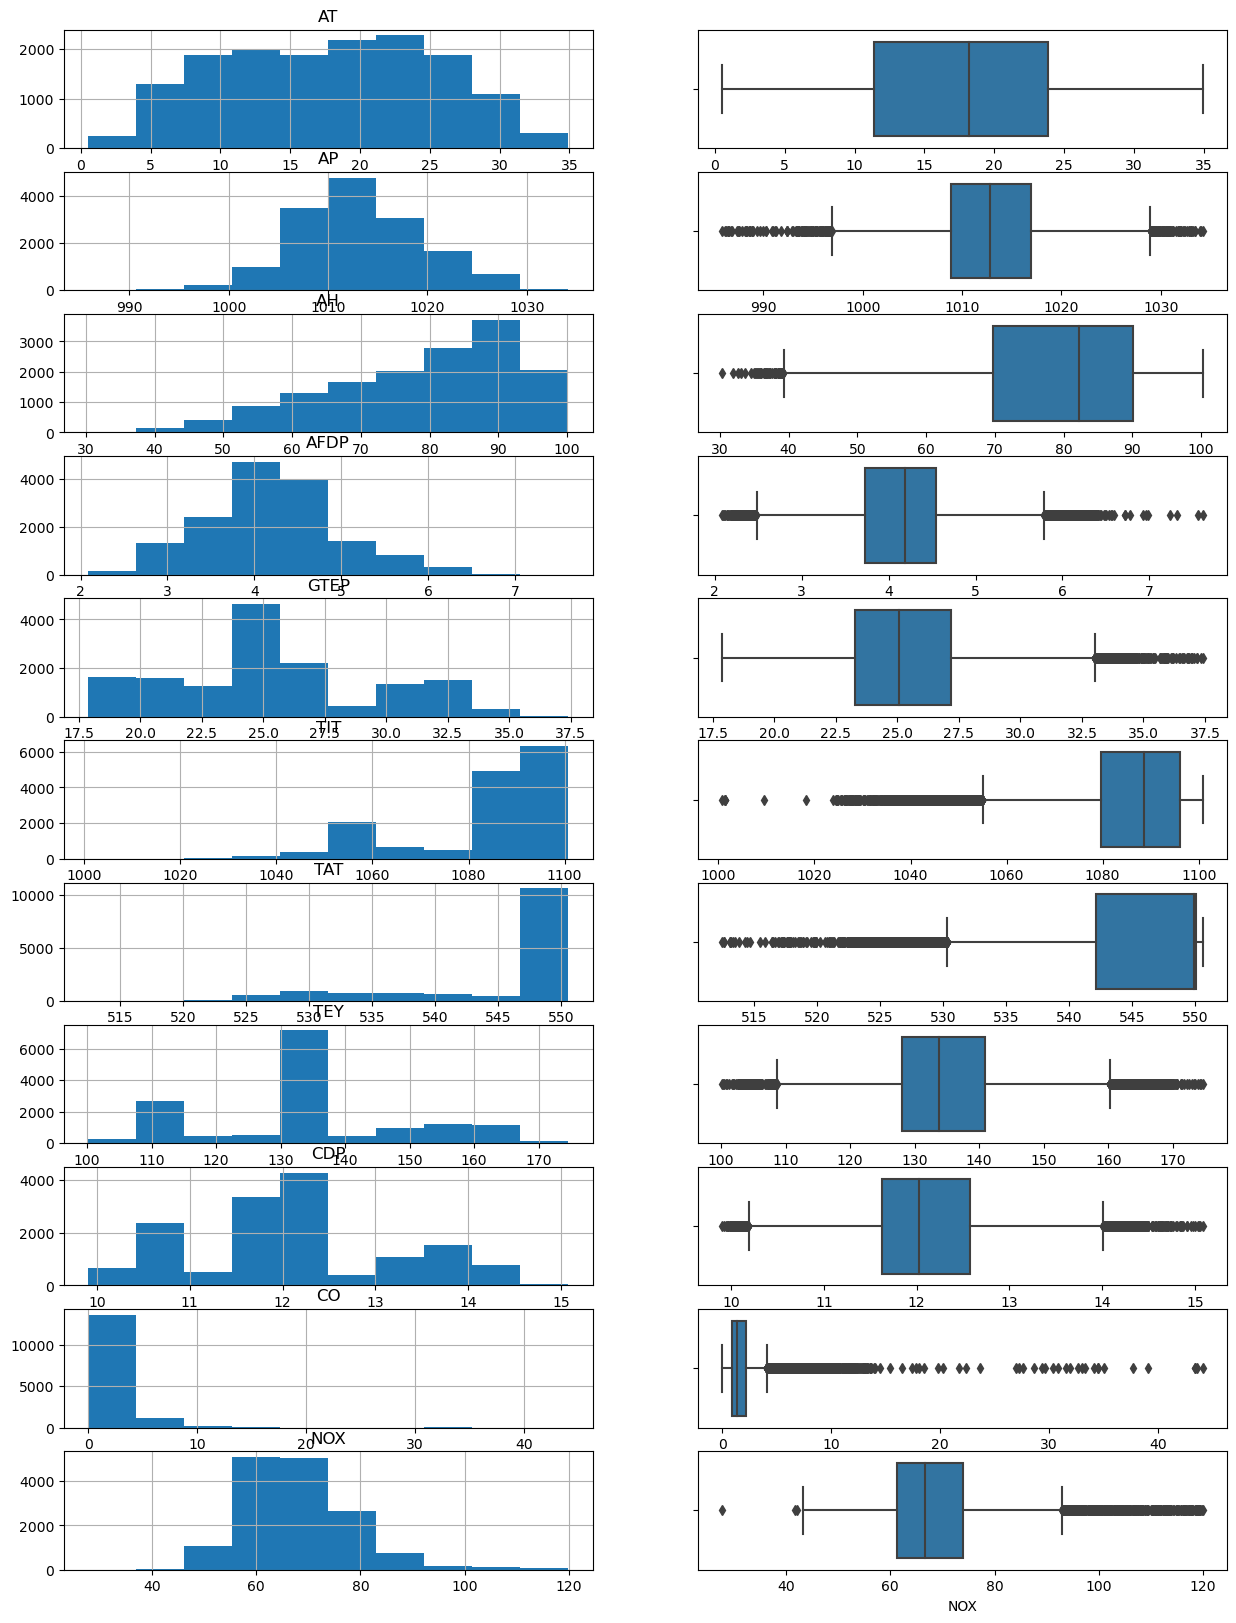

In [11]:
plt.subplots(figsize=(15,20))

[plt.subplot(11,2,1),data['AT'].hist(),plt.title("AT")],[plt.subplot(11,2,2),sns.boxplot(x=data["AT"])]
[plt.subplot(11,2,3),data['AP'].hist(),plt.title("AP")],[plt.subplot(11,2,4),sns.boxplot(x=data["AP"])]
[plt.subplot(11,2,5),data['AH'].hist(),plt.title("AH")],[plt.subplot(11,2,6),sns.boxplot(x=data["AH"])]
[plt.subplot(11,2,7),data['AFDP'].hist(),plt.title("AFDP")],[plt.subplot(11,2,8),sns.boxplot(x=data["AFDP"])]
[plt.subplot(11,2,9),data['GTEP'].hist(),plt.title("GTEP")],[plt.subplot(11,2,10),sns.boxplot(x=data["GTEP"])]

[plt.subplot(11,2,11),data['TIT'].hist(),plt.title("TIT")],[plt.subplot(11,2,12),sns.boxplot(x=data["TIT"])]

[plt.subplot(11,2,13),data['TAT'].hist(),plt.title("TAT")],[plt.subplot(11,2,14),sns.boxplot(x=data["TAT"])]

[plt.subplot(11,2,15),data['TEY'].hist(),plt.title("TEY")],[plt.subplot(11,2,16),sns.boxplot(x=data["TEY"])]

[plt.subplot(11,2,17),data['CDP'].hist(),plt.title("CDP")],[plt.subplot(11,2,18),sns.boxplot(x=data["CDP"])]

[plt.subplot(11,2,19),data['CO'].hist(),plt.title("CO")],[plt.subplot(11,2,20),sns.boxplot(x=data["CO"])]

[plt.subplot(11,2,21),data['NOX'].hist(),plt.title("NOX")],[plt.subplot(11,2,22),sns.boxplot(x=data["NOX"])]

In [12]:
x = data.iloc[:,0:12]
y = data['TEY']

In [13]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [15]:
x=x.drop(["TEY"],axis=1)

In [16]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [17]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [18]:
seed = 10
np.random.seed(seed)

In [19]:
model = Sequential() 
model.add(Dense(25, input_dim=10,  activation='relu')) 
model.add(Dense(25,  activation='relu')) 
model.add(Dense(25, activation='sigmoid')) 
model.add(Dense(25, activation='tanh')) 
model.add(Dense(25, activation='leaky_relu'))

In [20]:
model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_percentage_error'])
model

In [21]:
fil_model=model.fit(x, y, validation_split=0.30, epochs=50, batch_size=30)

Epoch 1/50
351/351 [==============================] - 2s 3ms/step - loss: 17190.0371 - mean_absolute_percentage_error: 96.0147 - val_loss: 14799.5459 - val_mean_absolute_percentage_error: 91.8158
Epoch 2/50
351/351 [==============================] - 1s 2ms/step - loss: 14707.0303 - mean_absolute_percentage_error: 88.5961 - val_loss: 12669.2734 - val_mean_absolute_percentage_error: 84.7355
Epoch 3/50
351/351 [==============================] - 1s 2ms/step - loss: 12650.6738 - mean_absolute_percentage_error: 81.9431 - val_loss: 10815.9385 - val_mean_absolute_percentage_error: 78.0638
Epoch 4/50
351/351 [==============================] - 1s 2ms/step - loss: 10837.8945 - mean_absolute_percentage_error: 75.6085 - val_loss: 9177.4697 - val_mean_absolute_percentage_error: 71.6596
Epoch 5/50
351/351 [==============================] - 1s 2ms/step - loss: 9227.0576 - mean_absolute_percentage_error: 69.5016 - val_loss: 7725.2891 - val_mean_absolute_percentage_error: 65.4725
Epoch 6/50
351/351 [===

In [22]:
score = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

470/470 [==============================] - 0s 983us/step - loss: 252.0770 - mean_absolute_percentage_error: 8.9195
mean_absolute_percentage_error: 891.95%


In [23]:
model.metrics_names, score ,fil_model.history.keys()

(['loss', 'mean_absolute_percentage_error'],
 [252.07701110839844, 8.91947078704834],
 dict_keys(['loss', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_absolute_percentage_error']))

In [24]:
fil_model.history['mean_absolute_percentage_error']

[96.01473236083984,
 88.59613037109375,
 81.94306945800781,
 75.60847473144531,
 69.50162506103516,
 63.5941276550293,
 57.879215240478516,
 52.340457916259766,
 46.97902297973633,
 41.78163146972656,
 36.79130172729492,
 31.97821044921875,
 27.398950576782227,
 23.06212615966797,
 19.06358528137207,
 16.10577964782715,
 14.040078163146973,
 12.322040557861328,
 10.922346115112305,
 9.825865745544434,
 8.98588752746582,
 8.41927719116211,
 8.224126815795898,
 8.355831146240234,
 8.513100624084473,
 8.594891548156738,
 8.598259925842285,
 8.616891860961914,
 8.609674453735352,
 8.656301498413086,
 8.607601165771484,
 8.62860107421875,
 8.61635684967041,
 8.641148567199707,
 8.656813621520996,
 8.55573844909668,
 8.668164253234863,
 8.577539443969727,
 8.668813705444336,
 8.587376594543457,
 8.653681755065918,
 8.60389232635498,
 8.654562950134277,
 8.615774154663086,
 8.643617630004883,
 8.583817481994629,
 8.642614364624023,
 8.611821174621582,
 8.636213302612305,
 8.618083000183105]

In [25]:
fil_model.history['val_mean_absolute_percentage_error']

[91.81575775146484,
 84.73551940917969,
 78.06379699707031,
 71.65962219238281,
 65.47250366210938,
 59.4849967956543,
 53.68504333496094,
 48.06306457519531,
 42.62070083618164,
 37.37126541137695,
 32.31462097167969,
 27.476171493530273,
 22.865089416503906,
 18.591449737548828,
 14.88754653930664,
 12.997432708740234,
 11.787522315979004,
 10.85709285736084,
 10.157072067260742,
 9.659114837646484,
 9.326475143432617,
 9.126222610473633,
 9.233479499816895,
 9.419361114501953,
 9.546377182006836,
 9.563533782958984,
 9.60398006439209,
 9.599811553955078,
 9.624399185180664,
 9.599764823913574,
 9.6021728515625,
 9.61144733428955,
 9.614853858947754,
 9.590744018554688,
 9.472410202026367,
 9.66485595703125,
 9.541581153869629,
 9.67792797088623,
 9.566356658935547,
 9.67166805267334,
 9.572071075439453,
 9.673139572143555,
 9.59866714477539,
 9.579249382019043,
 9.498186111450195,
 9.671504020690918,
 9.63674545288086,
 9.657737731933594,
 9.574710845947266,
 9.611037254333496]

In [26]:
fil_model.history['loss']

[17190.037109375,
 14707.0302734375,
 12650.673828125,
 10837.89453125,
 9227.0576171875,
 7795.9599609375,
 6528.12451171875,
 5410.95849609375,
 4433.22216796875,
 3585.884765625,
 2859.887451171875,
 2246.60986328125,
 1737.696533203125,
 1324.3319091796875,
 997.5694580078125,
 747.8287963867188,
 564.4332275390625,
 436.73291015625,
 353.2943115234375,
 302.9866638183594,
 275.7136535644531,
 262.55743408203125,
 257.1761779785156,
 255.39596557617188,
 254.94625854492188,
 254.8552703857422,
 254.85841369628906,
 254.8365936279297,
 254.84500122070312,
 254.8333282470703,
 254.87396240234375,
 254.86788940429688,
 254.85121154785156,
 254.8457794189453,
 254.85494995117188,
 254.83349609375,
 254.84446716308594,
 254.86570739746094,
 254.86363220214844,
 254.84906005859375,
 254.8704071044922,
 254.85414123535156,
 254.8702850341797,
 254.8875274658203,
 254.861572265625,
 254.85296630859375,
 254.8735809326172,
 254.85560607910156,
 254.88052368164062,
 254.86581420898438]

In [27]:
fil_model.history['val_loss']

[14799.5458984375,
 12669.2734375,
 10815.9384765625,
 9177.4697265625,
 7725.2890625,
 6442.2939453125,
 5314.22314453125,
 4328.53759765625,
 3475.397216796875,
 2746.696533203125,
 2132.2158203125,
 1624.5975341796875,
 1213.94384765625,
 891.9945678710938,
 648.7401123046875,
 473.8597717285156,
 356.2156982421875,
 284.3463134765625,
 246.18321228027344,
 231.0479736328125,
 229.1435089111328,
 233.19802856445312,
 238.15135192871094,
 242.01487731933594,
 244.42495727539062,
 244.75770568847656,
 245.55288696289062,
 245.4701690673828,
 245.959716796875,
 245.46932983398438,
 245.5170440673828,
 245.70138549804688,
 245.76919555664062,
 245.29092407226562,
 243.01039123535156,
 246.7769317626953,
 244.3321075439453,
 247.0439910888672,
 244.81263732910156,
 246.91600036621094,
 244.9241485595703,
 246.94606018066406,
 245.44747924804688,
 245.06471252441406,
 243.49887084960938,
 246.91256713867188,
 246.2074432373047,
 246.63229370117188,
 244.97581481933594,
 245.69314575195312

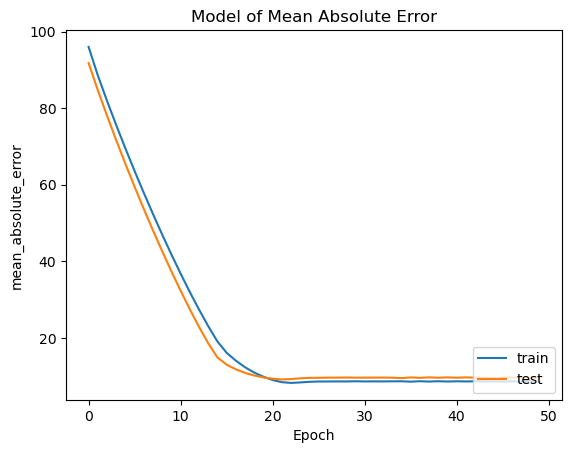

In [28]:
plt.plot(fil_model.history['mean_absolute_percentage_error'])
plt.plot(fil_model.history['val_mean_absolute_percentage_error'])
plt.title('Model of Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('mean_absolute_error')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

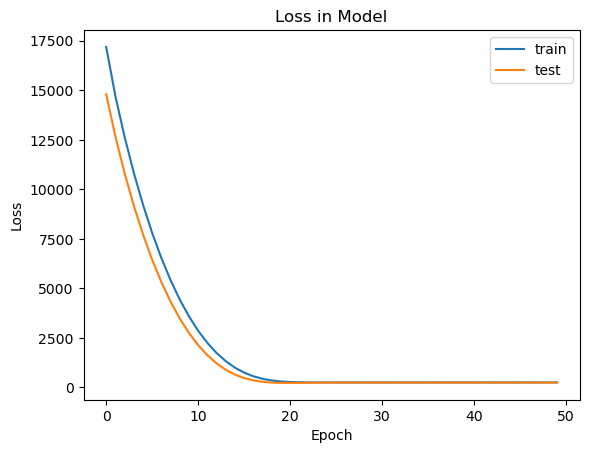

In [29]:
plt.plot(fil_model.history['loss'])
plt.plot(fil_model.history['val_loss'])
plt.title('Loss in Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper right')
plt.show()